In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
from pathlib import Path
import warnings
from IPython.display import clear_output

# Get the parent directory and add it to sys.path
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

warnings.filterwarnings("ignore")

from data_builder import TimeSeriesBuilder, read_trans, read_labels
from utils import read_data, set_seed, heuristic_alpha, heuristic_alpha2
from models import Model
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from training import train, test
from tqdm import tqdm
import pandas as pd
import numpy as np

In [38]:
folder = '../../Xenium/BreastS1R1/'
tf = 'RUNX1'
gene = 'TCF4'
tf_gene_folder = os.path.join(folder+'DelayPairs/', f"{tf}_{gene}/")
velos = pd.read_csv(tf_gene_folder + tf + '_' + gene + '_velos.csv', header=None)

In [39]:
from utils import granger_causality
pvalues, random_pvalues = granger_causality(velos)
none_indices = [index for index, value in enumerate(pvalues) if value is None]
pvalues = np.delete(pvalues, none_indices)
random_pvalues = np.delete(random_pvalues, none_indices)

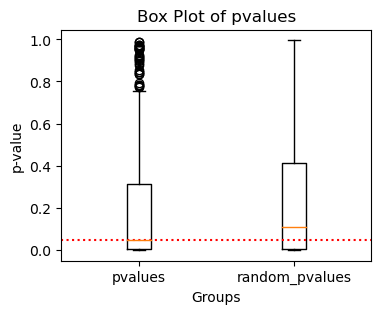

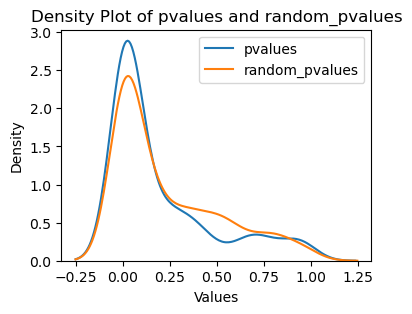

In [40]:
import seaborn as sns
plt.figure(figsize=(4, 3))
plt.title('Box Plot of pvalues')
plt.xlabel('Groups')
plt.ylabel('p-value')

plt.boxplot([pvalues, random_pvalues], labels=['pvalues', 'random_pvalues'])

plt.axhline(y=0.05, color='red', linestyle='dotted')

plt.show()

plt.figure(figsize=(4, 3))
plt.title('Density Plot of pvalues and random_pvalues')
plt.xlabel('Values')
plt.ylabel('Density')

sns.kdeplot(pvalues, label='pvalues')
sns.kdeplot(random_pvalues, label='random_pvalues')

plt.legend()
plt.show()


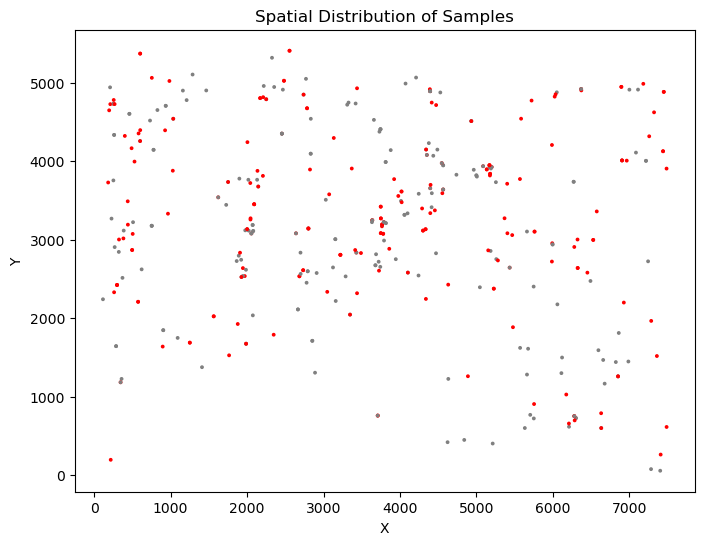

In [42]:
locs = pd.read_csv(tf_gene_folder + gene + '_locs.csv', names=['x', 'y']).drop(index=0)
locs.drop(index=none_indices, inplace=True)

# Create a mask for samples with pvalue lower than the threshold
mask = np.array(pvalues) < np.quantile(pvalues, 0.5)

# Plot the sample points
plt.figure(figsize=(8, 6))
plt.scatter(locs['x'], locs['y'], c=np.where(mask, 'red', 'grey'), s=3)
plt.title('Spatial Distribution of Samples')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
